In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from matplotlib.colors import to_rgba

#### **Carga de tablas.**

In [2]:
try:
    PROJECT_ROOT = Path(__file__).resolve().parents[1]
except NameError:
    PROJECT_ROOT = Path().resolve().parents[0]

RAW_DATA_PATH = PROJECT_ROOT / "data" / "raw"
def load_raw_data():
    visitas = pd.read_csv(RAW_DATA_PATH / "visits_log_us.csv")
    costos = pd.read_csv(RAW_DATA_PATH / "costs_us.csv")
    ordenes = pd.read_csv(RAW_DATA_PATH / "orders_log_us.csv")
    return visitas, costos, ordenes

In [3]:
visitas, costos, ordenes = load_raw_data()

In [4]:
def exploracion_inicial(df):
    print('-' * 30 + ' Estructura de la tabla ' + '-' * 30)
    print(df.info())
    
    print('-' * 30 + ' Duplicados ' + '-' * 30)
    print(f'Duplicados: {df.duplicated().sum()}')

    print('-' * 30 + ' Datos ausentes ' + '-' * 30)
    print(df.isna().sum())

    print('-' * 30 + ' Primeras filas ' + '-' * 30)
    print(df.head())


### **Exploración del archivo de visitas**

In [5]:
exploracion_inicial(visitas)

------------------------------ Estructura de la tabla ------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
------------------------------ Duplicados ------------------------------
Duplicados: 0
------------------------------ Datos ausentes ------------------------------
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
------------------------------ Primeras filas ------------------------------
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:0

Podemos observar que:
- No existen duplicados en el df
- No existen valores nulos en las columnas

### **Exploración del archivo de ordenes**

In [6]:
ordenes.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [7]:
exploracion_inicial(ordenes)

------------------------------ Estructura de la tabla ------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
------------------------------ Duplicados ------------------------------
Duplicados: 0
------------------------------ Datos ausentes ------------------------------
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
------------------------------ Primeras filas ------------------------------
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  1610923

Podemos observar que:
- No existen duplicados en el df
- No existen valores nulos en las columnas

### **Exploración del archivo de costos**

In [8]:
costos.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [9]:
exploracion_inicial(costos)

------------------------------ Estructura de la tabla ------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
------------------------------ Duplicados ------------------------------
Duplicados: 0
------------------------------ Datos ausentes ------------------------------
source_id    0
dt           0
costs        0
dtype: int64
------------------------------ Primeras filas ------------------------------
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


Podemos observar que:
- No existen duplicados en el df
- No existen valores nulos en las columnas

### Ajuste de tipos de datos:
Esta transformación prepara los datos para ingeniería de variables temporales, marketing y comportamiento.

In [10]:
# Ajustar tipos de datos en VISITS
visitas['Uid'] = visitas['Uid'].astype(str)
visitas['Device'] = visitas['Device'].astype('category')
visitas['Source Id'] = visitas['Source Id'].astype(str)

# Ajustar tipos de datos en ORDERS
ordenes['Uid'] = ordenes['Uid'].astype(str)
ordenes['Revenue'] = ordenes['Revenue'].astype(float)

# Ajustar tipos de datos en COSTS
costos['source_id'] = costos['source_id'].astype(str)
costos['dt'] = pd.to_datetime(costos['dt'])
costos['costs'] = costos['costs'].astype(float)


In [11]:
visitas.columns  = [ columna.lower().replace(' ','_') for columna in visitas.columns] # Normalizacion nombres

In [12]:
visitas['start_ts'] = pd.to_datetime(visitas['start_ts']) #Colimnas de fecha a datetime
visitas['end_ts'] = pd.to_datetime(visitas['end_ts'])

In [13]:
visitas.value_counts('device')

device
desktop    262567
touch       96833
Name: count, dtype: int64

Esto indica que:

    73% de las visitas vienen desde dispositivos de escritorio (desktop).

    27% provienen desde dispositivos móviles o touch.

nota: (device) es una variable de marketing clave, permitiendo segmentar usuarios según la plataforma utilizada.

In [14]:
visitas['start_ts'].min(), visitas['start_ts'].max()

(Timestamp('2017-06-01 00:01:00'), Timestamp('2018-05-31 23:59:00'))

Podemos observar el rango temporal de las visitas:
- La fecha más antigua Start_ts: 1 de junio de 2017 a las 00:01.
- La fecha más reciente Start_ts: 31 de mayo de 2018 a las 23:59.

In [15]:
visitas['end_ts'].min(), visitas['end_ts'].max()

(Timestamp('2017-06-01 00:02:00'), Timestamp('2018-06-01 01:26:00'))


- La fecha más antigua End_ts: 1 de junio de 2017 a las 00:02.
- La fecha más reciente: 1 de junio de 2018 a la 01:26.

In [16]:
ordenes.columns  = [ columna.lower().replace(' ','_') for columna in ordenes.columns]

In [17]:
ordenes['buy_ts'] = pd.to_datetime(ordenes['buy_ts']) #Columnas de fecha a datetime
ordenes['buy_ts'].min(), ordenes['buy_ts'].max() #Rango temporal

(Timestamp('2017-06-01 00:10:00'), Timestamp('2018-06-01 00:02:00'))

Creamos una variable date para costos con los datos de dt

In [18]:
costos['date'] = pd.to_datetime(costos['dt'])
costos.drop(['dt'], axis=1, inplace=True)

In [19]:
costos.head()

,source_id,costs,date
0,1,75.20,2017-06-01
1,1,62.25,2017-06-02
2,1,36.53,2017-06-03
3,1,55.00,2017-06-04
4,1,57.08,2017-06-05


Creamos las variables para visitas diarias, semanales y mensuales

In [20]:
visitas['sesion_mes'] = visitas['start_ts'].dt.strftime('%Y-%m-01')
visitas['sesion_semana'] = visitas['start_ts'].dt.isocalendar().week
visitas['sesion_fecha'] = visitas['start_ts'].dt.date

In [21]:
visitas.head()

,device,end_ts,source_id,start_ts,uid,sesion_mes,sesion_semana,sesion_fecha
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27


#### **Verificacion de duplicados y valores faltantes**

In [22]:
def check_dup(df, nombre):
    print(f"--- {nombre} ---")
    print(f"Duplicados: {df.duplicated().sum()}")
    print(f"Valores nulos:\n{df.isnull().sum()}")
    print("\n")

#Revisamos nuevamente los duplicados
check_dup(visitas, "VISITS")
check_dup(ordenes, "ORDERS")
check_dup(costos, "COSTS")


--- VISITS ---
Duplicados: 0
Valores nulos:
device           0
end_ts           0
source_id        0
start_ts         0
uid              0
sesion_mes       0
sesion_semana    0
sesion_fecha     0
dtype: int64


--- ORDERS ---
Duplicados: 0
Valores nulos:
buy_ts     0
revenue    0
uid        0
dtype: int64


--- COSTS ---
Duplicados: 0
Valores nulos:
source_id    0
costs        0
date         0
dtype: int64




No hay valores repetidos aun despues de la creacion de nuevas variables

## **Feature Engineering**

### **Variables de comportamiento**

Ahora, procederemos a crear variables que puedan describir el comportamiento de los usuarios. En este caso:

- Su nivel de actividad

- Frecuencia y valor de compra

- Retención y ciclo de vida

- Origen de adquisición

In [23]:
# Calcular fecha de primera y última compra
first_purchase = ordenes.groupby("uid")["buy_ts"].min().rename("first_purchase")
last_purchase = ordenes.groupby("uid")["buy_ts"].max().rename("last_purchase")

active_days = (last_purchase - first_purchase).dt.days + 1 # Calcular duración en días del período de compras 
                                                        # (sumamos 1 para evitar división por cero)


order_count = ordenes.groupby('uid')['buy_ts'].count().rename("order_count") #Numero de ordenes por usuario
ordenes['order_count'] = order_count

ordenes['registration_month'] = ordenes['buy_ts'].dt.to_period('M') # Promedio

pedidos_por_mes = ordenes.groupby('registration_month')['order_count'].mean()

# Calcular frecuencia de compra (órdenes por día activo)
purchase_frequency = (order_count / active_days).rename("purchase_frequency")

#Retención simple: días entre primera y última compra
ordenes["buy_ts"] = pd.to_datetime(ordenes["buy_ts"])
retention_days = (last_purchase - first_purchase).dt.days.rename("retention_days")

sessions_per_day = visitas.groupby('sesion_fecha').size() # Sesiones por dia

total_revenue = ordenes.groupby("uid")["revenue"].sum().rename("total_revenue")

# AVERAGE ORDER VALUE
aov = (total_revenue / order_count).rename("aov")
visitas['sesion_fecha'] = pd.to_datetime(visitas['sesion_fecha'])
print(visitas.head())
source_por_uid = visitas.sort_values(by='sesion_fecha').groupby('uid')['source_id'].first().reset_index()
ordenes = ordenes.merge(source_por_uid, on='uid', how='left')

print(ordenes.head())

    device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid  sesion_mes  sesion_semana sesion_fecha  
0  16879256277535980062  2017-12-01             51   2017-12-20  
1    104060357244891740  2018-02-01              8   2018-02-19  
2   7459035603376831527  2017-07-01             26   2017-07-01  
3  16174680259334210214  2018-05-01             20   2018-05-20  
4   9969694820036681168  2017-12-01             52   2017-12-27  
               buy_ts  revenue                   uid  order_count  \
0 2017-06-01 00:10:00    17.00  10329302124590727494          NaN   
1 2017-06-01 00:25:00     0.55  11627257723692907447          NaN   
2 2017-06-01

In [24]:
features = pd.concat([
    total_revenue, 
    aov, 
    first_purchase, 
    last_purchase, 
    active_days, 
    purchase_frequency
], axis=1).reset_index()

# Hacer merge con el DataFrame original
ordenes = ordenes.merge(features, on="uid", how="left")

# Mostrar resultado
print(ordenes.head())


               buy_ts  revenue                   uid  order_count  \
0 2017-06-01 00:10:00    17.00  10329302124590727494          NaN   
1 2017-06-01 00:25:00     0.55  11627257723692907447          NaN   
2 2017-06-01 00:27:00     0.37  17903680561304213844          NaN   
3 2017-06-01 00:29:00     0.55  16109239769442553005          NaN   
4 2017-06-01 07:58:00     0.37  14200605875248379450          NaN   

  registration_month source_id  total_revenue    aov      first_purchase  \
0            2017-06         1          17.00  17.00 2017-06-01 00:10:00   
1            2017-06         2           0.55   0.55 2017-06-01 00:25:00   
2            2017-06         2           0.37   0.37 2017-06-01 00:27:00   
3            2017-06         2           0.55   0.55 2017-06-01 00:29:00   
4            2017-06         3           0.37   0.37 2017-06-01 07:58:00   

        last_purchase  0  purchase_frequency  
0 2017-06-01 00:10:00  1                 1.0  
1 2017-06-01 00:25:00  1          

Usuarios con una sola orden tienen:

    - aov igual a su único revenue

    - first_purchase == last_purchase

    - purchase_frequency = 1 / 1 día activo = 1.0

##### **Tendencia de gasto**
Modelamos cómo evoluciona el gasto a lo largo del tiempo por usuario.

In [25]:
from sklearn.linear_model import LinearRegression
# Tendencia de gasto
def gasto_slope(df):
    df = df.sort_values('buy_ts')
    df['days'] = (df['buy_ts'] - df['buy_ts'].min()).dt.days
    if len(df) < 2:
        return 0.0
    X = df[['days']]
    y = df['revenue']
    model = LinearRegression().fit(X, y)
    return model.coef_[0]

# Calcular la pendiente por uid
slope_by_user = ordenes.groupby('uid', group_keys=False).apply(gasto_slope).rename("gasto_slope").reset_index()

ordenes = ordenes.merge(slope_by_user, on='uid', how='left')
ordenes.head()
print(ordenes[['uid', 'buy_ts', 'revenue', 'gasto_slope']].head())

slope_by_user = ordenes.groupby('uid').apply(gasto_slope).rename('gasto_slope')

/tmp/ipykernel_4048/2053913414.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slope_by_user = ordenes.groupby('uid', group_keys=False).apply(gasto_slope).rename("gasto_slope").reset_index()


                    uid              buy_ts  revenue  gasto_slope
0  10329302124590727494 2017-06-01 00:10:00    17.00          0.0
1  11627257723692907447 2017-06-01 00:25:00     0.55          0.0
2  17903680561304213844 2017-06-01 00:27:00     0.37          0.0
3  16109239769442553005 2017-06-01 00:29:00     0.55          0.0
4  14200605875248379450 2017-06-01 07:58:00     0.37          0.0


/tmp/ipykernel_4048/2053913414.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slope_by_user = ordenes.groupby('uid').apply(gasto_slope).rename('gasto_slope')


##### **Abandono o retención**
Creamos un índice que indica si un usuario ha dejado de realizar compras en los últimos 90 días, usando la columna *last_purchase*.

In [26]:
cutoff_date = ordenes['last_purchase'].max() - pd.Timedelta(days=90)

# Calculamos el abandono: 1 si la última compra es antes del cutoff_date, 0 si es después
abandono = (ordenes['last_purchase'] < cutoff_date).astype(int)

# Asignamos el nombre de la nueva columna
ordenes['abandono_flag'] = abandono
print(ordenes.head())


               buy_ts  revenue                   uid  order_count  \
0 2017-06-01 00:10:00    17.00  10329302124590727494          NaN   
1 2017-06-01 00:25:00     0.55  11627257723692907447          NaN   
2 2017-06-01 00:27:00     0.37  17903680561304213844          NaN   
3 2017-06-01 00:29:00     0.55  16109239769442553005          NaN   
4 2017-06-01 07:58:00     0.37  14200605875248379450          NaN   

  registration_month source_id  total_revenue    aov      first_purchase  \
0            2017-06         1          17.00  17.00 2017-06-01 00:10:00   
1            2017-06         2           0.55   0.55 2017-06-01 00:25:00   
2            2017-06         2           0.37   0.37 2017-06-01 00:27:00   
3            2017-06         2           0.55   0.55 2017-06-01 00:29:00   
4            2017-06         3           0.37   0.37 2017-06-01 07:58:00   

        last_purchase  0  purchase_frequency  gasto_slope  abandono_flag  
0 2017-06-01 00:10:00  1                 1.0         

*abandono_flag*: Esta columna es clave para identificar a los usuarios que han abandonado la plataforma.

##### **Días desde última compra**
Calculamos una nueva variable llamada *dias_sin_comprar* indicando cuántos días han pasado desde la última compra de cada usuario.

In [27]:
dias_sin_comprar = (ordenes['last_purchase'].max() - ordenes['last_purchase']).dt.days

ordenes['dias_sin_comprar'] = dias_sin_comprar

print(ordenes[['uid', 'dias_sin_comprar']].head())

                    uid  dias_sin_comprar
0  10329302124590727494               364
1  11627257723692907447               364
2  17903680561304213844               364
3  16109239769442553005               364
4  14200605875248379450               364


#### **Variables estacionales**
Ahora calculamos el mes de la primera comprar para cada usuario en el dataset.

In [28]:
# Mes de la primera compra
ordenes['mes_primera_compra'] = ordenes.groupby('uid')['first_purchase'].transform(lambda x: x.dt.month)
visitas.head(10)

,device,end_ts,source_id,start_ts,uid,sesion_mes,sesion_semana,sesion_fecha
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-01,35,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,5,2018-01-30
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-01,44,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-01,29,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-01,45,2017-11-08


Ahora hechamos un vistazo a las variables generadas

In [29]:
ordenes.head(10)

,buy_ts,revenue,uid,order_count,registration_month,source_id,total_revenue,aov,first_purchase,last_purchase,0,purchase_frequency,gasto_slope,abandono_flag,dias_sin_comprar,mes_primera_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,NaN,2017-06,1,17.00,17.000000,2017-06-01 00:10:00,2017-06-01 00:10:00,1,1.000000,0.00000,1,364,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,NaN,2017-06,2,0.55,0.550000,2017-06-01 00:25:00,2017-06-01 00:25:00,1,1.000000,0.00000,1,364,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,NaN,2017-06,2,0.37,0.370000,2017-06-01 00:27:00,2017-06-01 00:27:00,1,1.000000,0.00000,1,364,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,NaN,2017-06,2,0.55,0.550000,2017-06-01 00:29:00,2017-06-01 00:29:00,1,1.000000,0.00000,1,364,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,NaN,2017-06,3,0.37,0.370000,2017-06-01 07:58:00,2017-06-01 07:58:00,1,1.000000,0.00000,1,364,6
5,2017-06-01 08:43:00,0.18,10402394430196413321,NaN,2017-06,3,0.18,0.180000,2017-06-01 08:43:00,2017-06-01 08:43:00,1,1.000000,0.00000,1,364,6
6,2017-06-01 08:54:00,1.83,12464626743129688638,NaN,2017-06,5,9.16,4.580000,2017-06-01 08:54:00,2017-06-05 14:30:00,5,0.400000,1.37500,1,360,6
7,2017-06-01 09:22:00,1.22,3644482766749211722,NaN,2017-06,5,1444.29,6.043054,2017-06-01 09:22:00,2018-05-13 18:28:00,347,0.688761,-0.00087,0,18,6
8,2017-06-01 09:22:00,3.30,17542070709969841479,NaN,2017-06,4,3.30,3.300000,2017-06-01 09:22:00,2017-06-01 09:22:00,1,1.000000,0.00000,1,364,6
9,2017-06-01 09:23:00,0.37,1074355127080856382,NaN,2017-06,1,0.37,0.370000,2017-06-01 09:23:00,2017-06-01 09:23:00,1,1.000000,0.00000,1,364,6


#### **Variables de Marketing**

Se agregan dos nuevas columnas a tu DataFrame visitas: una para el día de la semanay otra para la estación del año, todo esto según el mes de la fecha de la sesión.

In [30]:
visitas['sesion_fecha'] = pd.to_datetime(visitas['sesion_fecha'], errors='coerce')

visitas['weekday'] = visitas['sesion_fecha'].dt.day_name()
# Día de la semana
visitas['weekday'] = visitas['sesion_fecha'].dt.day_name()

# Estación del año según el mes
visitas['season'] = visitas['sesion_fecha'].dt.month.map({
    12: 'winter', 1: 'winter', 2: 'winter',
    3: 'spring', 4: 'spring', 5: 'spring',
    6: 'summer', 7: 'summer', 8: 'summer',
    9: 'autumn', 10: 'autumn', 11: 'autumn'
})

Ahora calculamos el número de usuarios por: día, semana y mes.

In [31]:
dau = visitas.groupby('sesion_fecha').agg({'uid': 'nunique'})
wau = visitas.groupby('sesion_semana').agg({'uid': 'nunique'})
mau = visitas.groupby('sesion_mes').agg({'uid': 'nunique'})

Por último, calculamos el total de sesiones registradas ese día y la cantidad de usuarios únicos que tuvieron al menos una sesión.

In [32]:
#Sesiones por usuario
sesiones_por_usuario = visitas.groupby('sesion_fecha').agg({'uid': ['count', 'nunique']})
sesiones_por_usuario.columns = ['n_sesiones', 'n_usuarios']

Ahora hechamos un vistazo a las variables generadas:

In [33]:
visitas.head()

,device,end_ts,source_id,start_ts,uid,sesion_mes,sesion_semana,sesion_fecha,weekday,season
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,Wednesday,winter
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,Monday,winter
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,Saturday,summer
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,Sunday,spring
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27,Wednesday,winter


sesion_fecha
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Sesiones por día, dtype: int64
Promedio de sesiones por día: 987.36


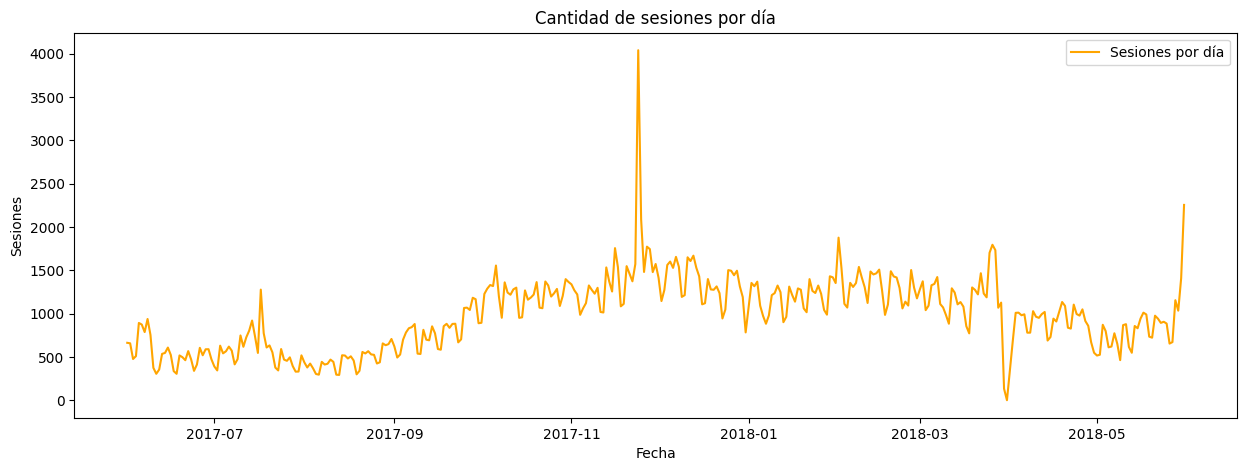

In [34]:
sessions_per_day.name = 'Sesiones por día'

print(sessions_per_day.head())

print("Promedio de sesiones por día:", round(sessions_per_day.mean(), 2))

plt.figure(figsize=(15,5))
sessions_per_day.plot(label='Sesiones por día', color='orange')
plt.title('Cantidad de sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Sesiones')
plt.legend()
plt.show()

Se calcula un promedio de 987.36 sesiones por día, lo cual sugiere que:

- Algunos días (como fines de semana o fechas especiales) probablemente tienen menor número de sesiones.

- Otros días, muy activos, están elevando ese promedio.

count    131231.000000
mean         28.110194
std          49.728746
min           0.000000
25%           0.678472
50%           4.905556
75%          31.963542
max         362.540278
Name: time_since_last_visit, dtype: float64


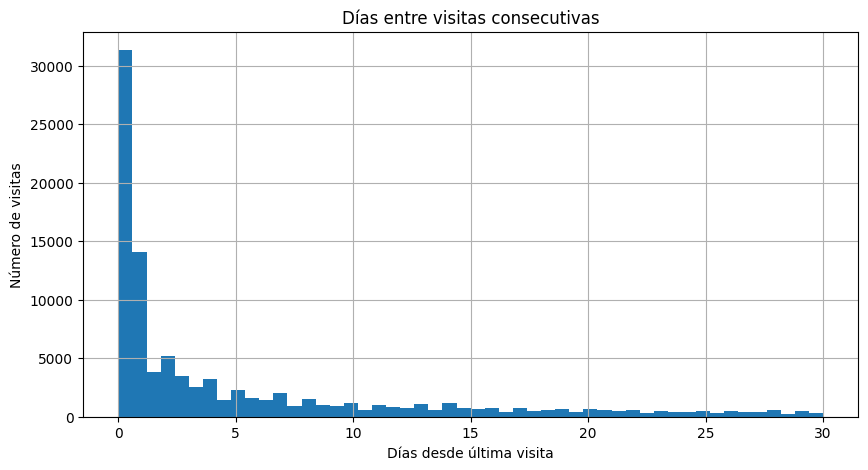

In [35]:
# Frecuencia con la que los usuarios regresan

visits_sorted = visitas.sort_values(by=['uid', 'start_ts'])

visits_sorted['prev_session'] = visits_sorted.groupby('uid')['start_ts'].shift(1)
visits_sorted['time_since_last_visit'] = (visits_sorted['start_ts'] - visits_sorted['prev_session']).dt.total_seconds() / (60*60*24)  # en días

print(visits_sorted['time_since_last_visit'].describe())
plt.figure(figsize=(10,5))
visits_sorted['time_since_last_visit'].dropna().hist(bins=50, range=(0,30))
plt.title('Días entre visitas consecutivas')
plt.xlabel('Días desde última visita')
plt.ylabel('Número de visitas')
plt.show()


Hay un pico muy alto en los primeros días, probablemente dentro de la primera semana. Esto indica que mientras muchos usuarios regresan pronto, hay una larga cola de usuarios que tardan más o incluso abandonan.

Ahora, preparamos las variables de registro y conversión: calcula la fecha en la que cada usuario se registró, cuándo hizo su primera compra y cuántos días tardó en convertir. 

In [36]:
registro = visitas.groupby('uid')['start_ts'].min().reset_index() # Asumimos que la 1era fecha de registro es la 1era visita
registro.columns = ['uid', 'registration_date']

primeras_compras = ordenes.groupby('uid')['buy_ts'].min().reset_index() #Fecha visita primera compra
primeras_compras.columns = ['uid', 'first_purchase_date']

In [37]:
visitas['start_ts'] = pd.to_datetime(visitas['start_ts'])
ordenes['buy_ts'] = pd.to_datetime(ordenes['buy_ts'])

registro = visitas.groupby('uid').agg({
    'start_ts': 'min',
    'source_id': 'first'
}).reset_index()
registro.columns = ['uid', 'registration_date', 'source_id']
primeras_compras = ordenes.groupby('uid')['buy_ts'].min().reset_index()
primeras_compras.columns = ['uid', 'first_purchase_date']
conversion = pd.merge(registro, primeras_compras, on='uid', how='inner')

conversion['days_to_convert'] = (conversion['first_purchase_date'] - conversion['registration_date']).dt.days
conversion['registration_month'] = conversion['registration_date'].dt.to_period("M")

Ahora calculamos el promedio de cuánto gasta un usuario en total y cuánto se gasta en promedio por pedido.

In [38]:
revenue_por_usuario = ordenes.groupby('uid')['revenue'].sum()
ticket_promedio_usuario = revenue_por_usuario.mean() # Ticket promedio por usuario
ticket_promedio_pedido = ordenes['revenue'].mean() # Ticket promedio por pedido


In [39]:
print(ordenes.head())

               buy_ts  revenue                   uid  order_count  \
0 2017-06-01 00:10:00    17.00  10329302124590727494          NaN   
1 2017-06-01 00:25:00     0.55  11627257723692907447          NaN   
2 2017-06-01 00:27:00     0.37  17903680561304213844          NaN   
3 2017-06-01 00:29:00     0.55  16109239769442553005          NaN   
4 2017-06-01 07:58:00     0.37  14200605875248379450          NaN   

  registration_month source_id  total_revenue    aov      first_purchase  \
0            2017-06         1          17.00  17.00 2017-06-01 00:10:00   
1            2017-06         2           0.55   0.55 2017-06-01 00:25:00   
2            2017-06         2           0.37   0.37 2017-06-01 00:27:00   
3            2017-06         2           0.55   0.55 2017-06-01 00:29:00   
4            2017-06         3           0.37   0.37 2017-06-01 07:58:00   

        last_purchase  0  purchase_frequency  gasto_slope  abandono_flag  \
0 2017-06-01 00:10:00  1                 1.0        

Procedemos a calcular el ingreso acumulado de un usuario en los 180 días posteriores a su primera compra (LTV_180)

In [40]:
# Asegurar que las fechas estén en formato datetime
ordenes['buy_ts'] = pd.to_datetime(ordenes['buy_ts'])
ordenes['first_purchase'] = pd.to_datetime(ordenes['first_purchase'])

# Filtrar compras dentro de los 180 días posteriores a la primera compra
ordenes['dentro_180'] = ordenes['buy_ts'] <= (ordenes['first_purchase'] + pd.Timedelta(days=180))

# Calcular LTV_180 sumando el revenue dentro del rango de 180 días
ltv_180 = ordenes[ordenes['dentro_180']].groupby('uid')['revenue'].sum().reset_index()
ltv_180.rename(columns={'revenue': 'LTV_180'}, inplace=True)

# Mostrar el resultado
print(ltv_180.head())

                    uid  LTV_180
0  10000837700716403746     2.20
1  10000997030965831953     1.83
2  10001199569370567060     1.00
3  10002243978166172255    17.41
4  10003351403065971701     6.72


- Un LTV bajo podría indicar que son usuarios que realizaron una compra inicial pero no volvieron a generar ingresos sustanciales en los 180 días posteriores.

- Un LTV alto sugiere que un usuario generó ingresos mucho más altos a lo largo de su relación con la plataforma durante los primeros 180 días.

In [41]:
# Agrupamos por mes y fuente
costos['date'] = pd.to_datetime(costos['date'])
costos['marketing_month'] = costos['date'].dt.to_period('M')

gasto_total_mes = costos.groupby('marketing_month')['costs'].sum() # Gasto por mes
gasto_por_fuente_mes = costos.groupby(['marketing_month', 'source_id'])['costs'].sum().unstack() # Gasto por fuente y mes

In [42]:
print("Gasto total por mes:\n", gasto_total_mes)
print("\nGasto por fuente y mes:\n", gasto_por_fuente_mes)

Gasto total por mes:
 marketing_month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64

Gasto por fuente y mes:
 source_id              1      10        2         3        4        5       9
marketing_month                                                              
2017-06          1125.61  314.22  2427.38   7731.65  3514.80  2616.12  285.22
2017-07          1072.88  329.82  2333.11   7674.37  3529.73  2998.14  302.54
2017-08           951.81  232.57  1811.05   6143.54  3217.36  2185.28  248.93
2017-09          1502.01  460.67  2985.66   9963.55  5192.26  3849.14  415.62
2017-10          2315.75  627.24  4845.00  15737.24  6420.84  5767.40  609.41
2017-11          2445.16  792.36  5247.68  17025.34  5388.82  6325.34  683.18
2017-12          2341.20  645.86  4

Los valores indican el gasto total en marketing para cada mes, con un aumento gradual a lo largo de 2017, alcanzando su pico en diciembre de 2017 (38,315.35). Luego, en los primeros meses de 2018, el gasto disminuye ligeramente.

Los meses con el mayor gasto en marketing (diciembre de 2017 y enero de 2018) podrían reflejar campañas de marketing intensivas durante la temporada navideña.

Se puede observar que las fuentes de marketing varían en cuanto a su contribución a los gastos, lo que sugiere que ciertas fuentes son más eficaces o se utilizan más a menudo.

In [43]:
ordenes['buy_ts'] = pd.to_datetime(ordenes['buy_ts'])
costos['date'] = pd.to_datetime(costos['date'])

# Fecha de conversión: primera compra por usuario
conversion_ts = ordenes.groupby('uid')['buy_ts'].min().rename('conversion_ts')

# Fuente por usuario
source = ordenes.groupby('uid')['source_id'].first()

# Unir conversión y fuente
usuarios = pd.concat([conversion_ts, source], axis=1).reset_index()

visitas.head()


,device,end_ts,source_id,start_ts,uid,sesion_mes,sesion_semana,sesion_fecha,weekday,season
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,Wednesday,winter
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,Monday,winter
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,Saturday,summer
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,Sunday,spring
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27,Wednesday,winter


Ahora procedemos a calcular el Customer Acquisition Cost por fuente de marketing.

In [44]:
clientes_por_fuente = ordenes.groupby('source_id')['uid'].nunique() # Clientes únicos por fuente

costo_por_fuente = costos.groupby('source_id')['costs'].sum() # Costo total por fuente

cac_por_fuente = costo_por_fuente / clientes_por_fuente # CAC por fuente
print(cac_por_fuente)

source_id
1      6.191165
10     4.471959
2     12.037694
3     13.941169
4      6.107971
5      7.280504
7           NaN
9      5.234810
dtype: float64


/tmp/ipykernel_4048/4212778364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cac_df, x='CAC', y='source_id', palette='plasma', orient='h')


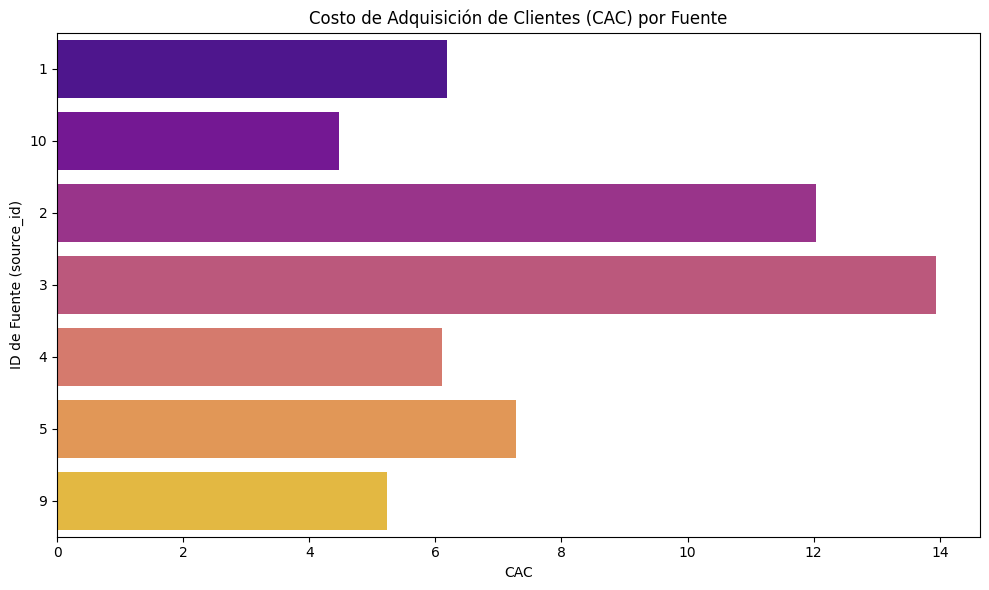

In [45]:
cac_df = cac_por_fuente.reset_index()
cac_df.columns = ['source_id', 'CAC']
cac_df = cac_df.dropna()

plt.figure(figsize=(10, 6))
sns.barplot(data=cac_df, x='CAC', y='source_id', palette='plasma', orient='h')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente')
plt.xlabel('CAC')
plt.ylabel('ID de Fuente (source_id)')
plt.tight_layout()
plt.show()

Los resultados nos muestran que el costo de adquisición de clientes varía entre las diferentes fuentes. En este caso, por ejemplo:

- Una fuente 10 tiene el CAC más bajo, con un valor de 4.47.

- Una fuente 3 tiene el CAC más alto, con un valor de 13.94.

Hemos culminado todo el Paso 1, ahora procedemos a guardar los datasets modificados para continuar con el paso 2.

In [46]:
# Define el directorio donde se guardarán los datasets procesados
PROCESSED_DATA_PATH = PROJECT_ROOT / "data" / "processed"

# Asegúrate de que el directorio exista
PROCESSED_DATA_PATH.mkdir(parents=True, exist_ok=True)

try:
    # Guardar los datasets procesados
    visitas.to_csv(PROCESSED_DATA_PATH / "visitas.csv", index=False)
    costos.to_csv(PROCESSED_DATA_PATH / "costos.csv", index=False)
    ordenes.to_csv(PROCESSED_DATA_PATH / "ordenes.csv", index=False)
    print("Archivos guardados correctamente en:", PROCESSED_DATA_PATH)
except Exception as e:
    print("Error al guardar los archivos:", e)

Archivos guardados correctamente en: /home/clext00396/Documents/pfinal_dm/Proyecto Final/notebooks/data/processed
